In [88]:
%matplotlib inline

import numpy as np
import scipy.optimize
import scipy.special
import matplotlib.pyplot as plt
import sys

def print_fl(output):
    print(output)
    sys.stdout.flush()

def get_raw_filename(sim_id, num_pol, T, F):
    return "../perm-sim-id-%s-numpol-%d-T-%.2f-F-%.2f.npz" % (sim_id, num_pol, T, F)

def get_summary_filename(sim_id, num_pol, T, F):
    return "../summaries/perm-summary-%s-numpol-%d-T-%.2f-F-%.2f.npz" % (sim_id, num_pol, T, F)

In [125]:
Ts = np.linspace(0.2, 6.0, 30)
Fs = np.concatenate((np.linspace(0.0, 0.1, 11), np.linspace(0.2, 1.0, 9)))
sim_id = "jsaw10k"
num_pol = 10000

In [134]:
F = 0.0
T = 1.0

data = np.load(get_summary_filename(sim_id, num_pol, T, F))



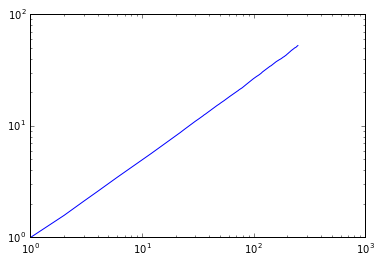

In [135]:
bd = np.arange(250)

plt.plot(bd, data["r_e2e"])
plt.xscale('log')
plt.yscale('log')

[ 0.74164615  0.87082333]
[ 0.74171069  0.34160149]


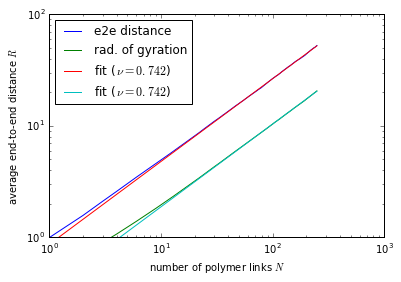

In [139]:
fitfunc = lambda x, a, b: b*x**a

p, _ = scipy.optimize.curve_fit(fitfunc, bd, data["r_e2e"])
p_gyr, _ = scipy.optimize.curve_fit(fitfunc, bd, data["r_gyration"])
print(p)
print(p_gyr)

plt.plot(bd, data["r_e2e"], label="e2e distance")
plt.plot(bd, data["r_gyration"], label="rad. of gyration")
plt.xscale('log')
plt.yscale('log')
plt.ylim(1,100)
plt.plot(bd, fitfunc(bd, *p), label=r"fit ($\,\nu = 0.742$)")
plt.plot(bd, fitfunc(bd, *p_gyr), label=r"fit ($\,\nu = 0.742$)")
plt.legend(loc=2)

plt.xlabel(r"number of polymer links $N$")
plt.ylabel(r"average end-to-end distance $R$")
plt.savefig("t-1-length-vs-beads.png", dpi=300)

/Users/jesse/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


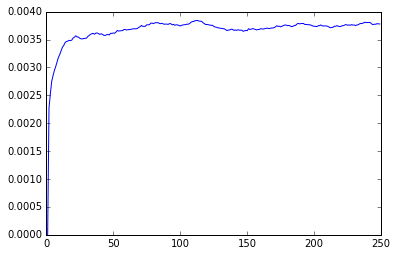

In [41]:
plt.plot(data["r_e2e_sd"]/data["r_e2e"])

In [67]:
Text = np.array([0.2, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
Fext = np.concatenate((np.linspace(0.0, 0.1, 11), np.linspace(0.2, 1.0, 9), np.linspace(1.25, 3.50, 10)))

bd = np.arange(250)

r_e2es = np.zeros((len(Text), len(Fext), len(bd)))
r_e2es_sd = np.zeros((len(Text), len(Fext), len(bd)))

x_e2es = np.zeros((len(Text), len(Fext), len(bd)))
y_e2es = np.zeros((len(Text), len(Fext), len(bd)))

for i in range(len(Text)):
    for j in range(len(Fext)):
        with np.load(get_summary_filename(sim_id, num_pol, Text[i], Fext[j])) as data:
            r_e2es[i,j,:] = data["r_e2e"]
            r_e2es_sd[i,j,:] = data["r_e2e_sd"]
            
            x_e2es[i,j,:] = data["x_e2e"]
            y_e2es[i,j,:] = data["y_e2e"]

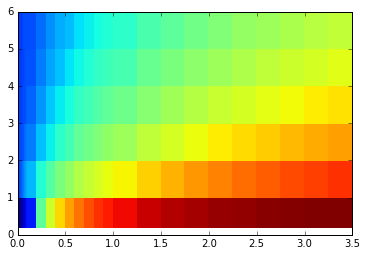

In [68]:
plt.pcolor(Fext, Text, r_e2es[:,:,-1])

1.0


/Users/jesse/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/Users/jesse/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide
/Users/jesse/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in subtract


(0, 250)

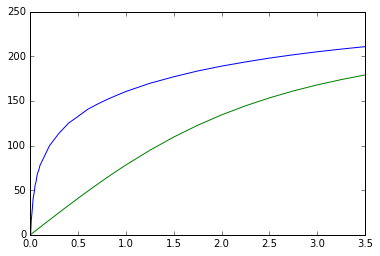

In [87]:
Tidx = 1
print(Text[Tidx])

coth = lambda x: np.cosh(x)/np.sinh(x)

coth_curve = lambda f, d, N, T: N*d*(coth(f*d/T) - T/(f*d))

plt.plot(Fext, x_e2es[Tidx,:,-1])
plt.plot(Fext, coth_curve(Fext, 1.0, 250, Text[Tidx]))
plt.ylim(0,250)

In [115]:
lowTFs = np.concatenate((np.linspace(0.0, 0.1, 11), np.linspace(0.2, 1.0, 9), np.linspace(1.25, 3.50, 10)))
lowT = 0.08

lt_r_e2es = np.zeros((len(lowTFs)))
lt_x_e2es = np.zeros((len(lowTFs)))

for i in range(len(lowTFs)):
    with np.load(get_summary_filename("forcelowt", 10000, lowT, lowTFs[i])) as data:
        lt_r_e2es[i] = data["r_e2e"][-1]
        lt_x_e2es[i] = data["x_e2e"][-1]

1.0


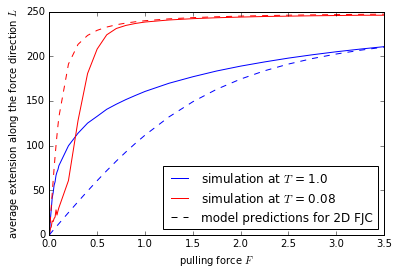

In [123]:
Tidx = 1
print(Text[Tidx])

pf2_curve = lambda FE: scipy.special.iv(1, FE) / scipy.special.iv(0, FE)
ff2_curve = lambda FE: np.log(scipy.special.iv(0, FE)) / FE

d = 1.0

plt.plot(Fext, x_e2es[Tidx,:,-1], label=r"simulation at $T$ = 1.0", color = "b")
plt.plot(lowTFs, lt_x_e2es, label=r"simulation at $T$ = 0.08", color="r")
plt.plot(Fext, 250*pf2_curve(Fext * d / Text[Tidx]), color="b", linestyle="dashed")
plt.plot(Fext, 250*pf2_curve(Fext * d / lowT), color="r", linestyle="dashed")
plt.plot(np.array([]), np.array([]), label=r"model predictions for 2D FJC", color="k", linestyle="dashed")
plt.ylim(0,250)

plt.xlabel(r"pulling force $F$")
plt.ylabel(r"average extension along the force direction $L$")
plt.legend(loc=4)

plt.savefig("force-extension-w-2dfjc.png", dpi=300)